---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [50]:
#EDA에 사용할 라이브러리를 import 하세요
import sys
import pandas as pd
import numpy as np
import scipy.stats as spst
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [51]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
sbikedata = pd.read_csv('sbikedata.csv')
sbikedata.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [52]:
sbikedata

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

### 가설 1(예시):
    - 귀무가설: 강우 여부와 따릉이 대여량 간에는 연관성이 없다.
    - 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.

### 가설 2 :
    - 귀무가설: ozone 수치와 따릉이 대여량 간에는 연관성이 없다.
    - 대립가설 : ozone 수치와 따릉이 대여량 간에는 연관성이 있다.

### 가설 3 :
    - 귀무가설: temperature 수치와 따릉이 대여량 간에는 연관성이 없다.
    - 대립가설 : temperature 수치와 따릉이 대여량 간에는 연관성이 있다.

### 가설 4 :
    - 귀무가설: windspeed 수치와 따릉이 대여량 간에는 연관성이 없다.
    - 대립가설 : windspeed 수치와 따릉이 대여량 간에는 연관성이 있다.

### 가설 5 :
    - 귀무가설: humidity 수치와 따릉이 대여량 간에는 연관성이 없다.
    - 대립가설 : humidity 수치와 따릉이 대여량 간에는 연관성이 있다.

### 가설 6 :
    - 귀무가설: visibility 수치와 따릉이 대여량 간에는 연관성이 없다.
    - 대립가설 : visibility 수치와 따릉이 대여량 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요? : 시간대 정보

2. 변수가 수치형인지 범주형인지


In [4]:
#변수의 자료형을 확인해보세요. ---> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [5]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
# -> hour는 결측치가 없다. 만약, 결측치가 있다면 바로 앞 또는 뒤의 데이터와 동일하게 처리 가능할 것 같다.

4. 변수의 기초 통계량 확인

In [6]:
#변수의 기초 통계량을 확인해보세요.
# -> 최소0, 최대23,중앙값12, 평균 11.5로 기초통계량을 보아 hour 변수에 특이점은 없어보인다.

5. 변수의 분포 확인

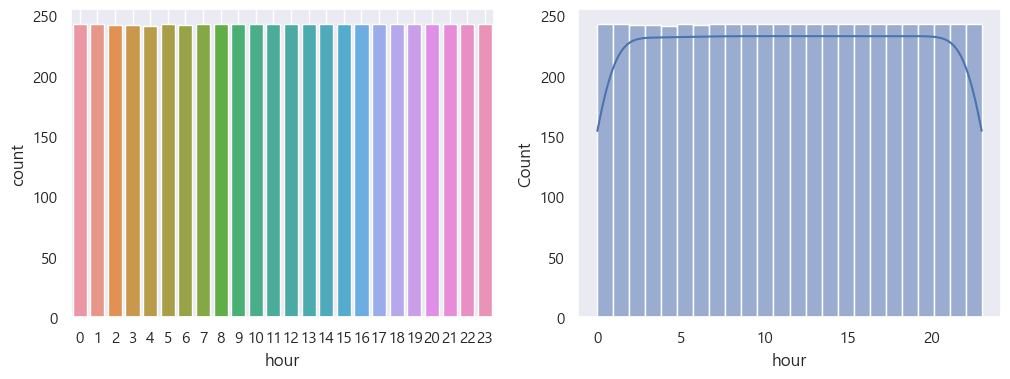

In [7]:
#변수의 분포를 확인해보세요. --> hour데이터는 시간 데이터로, 분포가 당연하게 고르다.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x='hour', data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x='hour', data=sbikedata, kde=True,  bins=24)
plt.grid()

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [8]:
#위 정보로부터 파악하신 내용을 정리해보세요.

# hour 변수는 어떤 의미를 가지고 있나요? : 시간대 정보

#변수의 자료형을 확인해보세요. ---> int64

#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
# -> hour는 결측치가 없다. 만약, 결측치가 있다면 바로 앞 또는 뒤의 데이터와 동일하게 처리 가능할 것 같다.

#변수의 기초 통계량을 확인해보세요.
# -> 최소0, 최대23,중앙값12, 평균 11.5로 기초통계량을 보아 hour 변수에 특이점은 없어보인다.

#변수의 분포를 확인해보세요. --> hour데이터는 시간 데이터로, 분포가 당연하게 고르다.

7. 추가 분석사항 도출

In [9]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
# 아직 없다

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요. -> 특정날짜, 시간대의 평균 온도

2. 변수가 수치형인지 범주형인지


In [10]:
#변수의 자료형을 확인해보세요. --> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [11]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# -> 결측치가 없다. 만약 결측치가 있다면, 전날, 또는 다음날의 평균값으로 처리 가능할 것 같다.

4. 변수의 기초 통계량 확인

In [12]:
#변수의 기초 통계량을 확인해보세요
# 최소-3, 최대36, 평균19, 편차7.5, 1분위14, 3분위24로 특이사항 없어보인다.
sbikedata['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

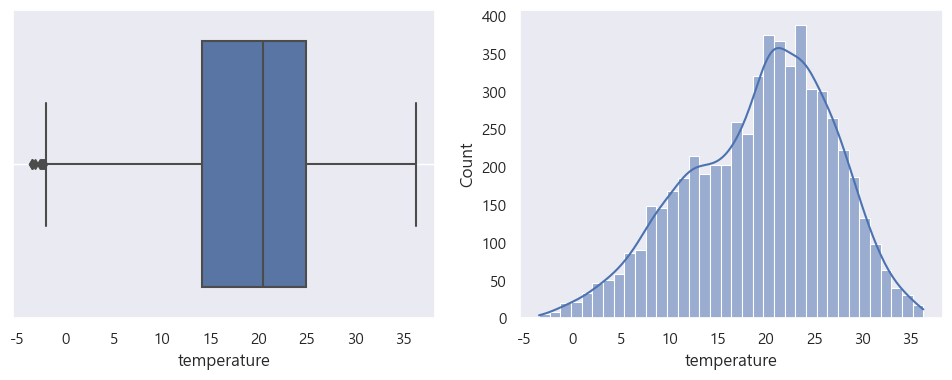

In [53]:
#변수의 분포를 확인해보세요. 
# --> 추운날이 별로 없다보다. 데이터 상 가장 추운날이 -3도 임에도 이상치로 분류되는 값이 존재한다.
var = 'temperature'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True,  bins=36)
plt.grid()

plt.show()

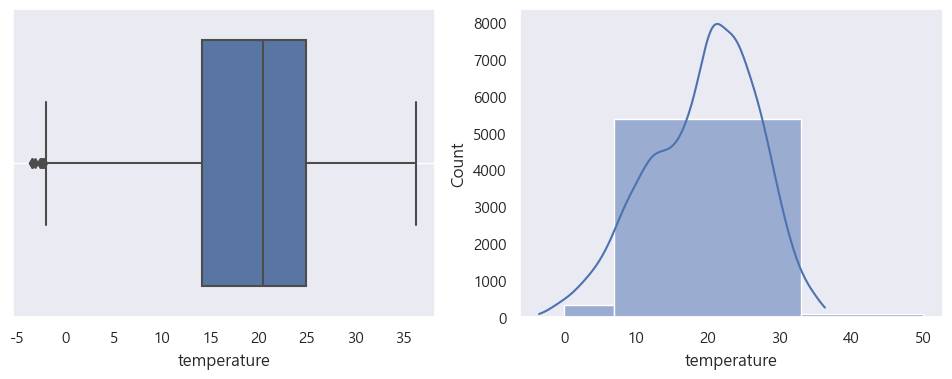

In [54]:
#변수의 분포를 확인해보세요. 
# --> 추운날이 별로 없다보다. 데이터 상 가장 추운날이 -3도 임에도 이상치로 분류되는 값이 존재한다.
var = 'temperature'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True,  bins=[0,7,33,50])
plt.grid()

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [55]:
#위 정보로부터 파악하신 내용을 정리해보세요.

# -> 특정날짜, 시간대의 평균 온도

#변수의 자료형을 확인해보세요. --> int64

#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# -> 결측치가 없다. 만약 결측치가 있다면, 전날, 또는 다음날의 평균값으로 처리 가능할 것 같다.

#변수의 기초 통계량을 확인해보세요
# 최소-3, 최대36, 평균19, 편차7.5, 1분위14, 3분위24로 특이사항 없어보인다.

#변수의 분포를 확인해보세요. 
# --> 추운날이 별로 없다보다. 데이터 상 가장 추운날이 -3도 임에도 이상치로 분류되는 값이 존재한다.

7. 추가 분석사항 도출

In [56]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
# 17도~23도 사이에 자전거를 많이 타는것 같다.
# -3도 이하에 타는건 뭐지?

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요. -> 강수 여부, 비가오면 1, 비가 안오면 0

2. 변수가 수치형인지 범주형인지


In [57]:
#변수의 자료형을 확인해보세요. --> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [58]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# -> 결측치가 없다. 만약 결측치가 존재하면.... 어떡할지 모르겠다. 
# 비울 맞춰서 random하게 처리하거나, 기온을 기준으로 비온날, 비 안온날의 기온에 따라 맞추는 것을 해볼수도 있겠다.
# 비오는날에는 미세먼지도 줄어들거 같다.

4. 변수의 기초 통계량 확인

In [59]:
#변수의 기초 통계량을 확인해보세요
# -> 평균이 0.07이다. 비가 오는 날이 7%라는 의미인게 맞을까?
sbikedata['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

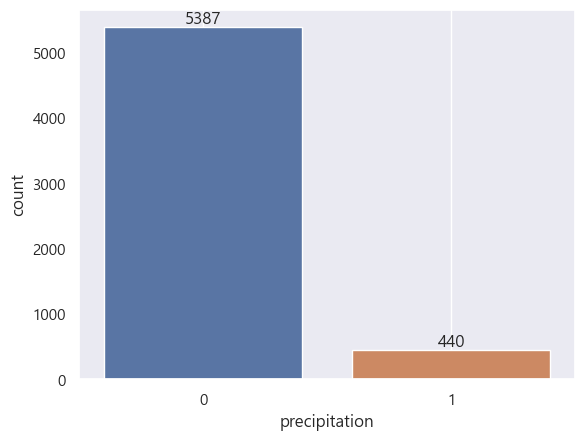

In [60]:
#변수의 분포를 확인해보세요. 
# 비가 오는날의 비울이 0.07%가 맞다.
# 대부분 자전거를 빌린 사람들은 비가 안온 날에 빌리는것 같다.
var = 'precipitation'

ax = sns.countplot(x=var, data=sbikedata)
plt.grid()

ax.bar_label(ax.containers[0])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

# -> 강수 여부, 비가오면 1, 비가 안오면 0
 
#변수의 자료형을 확인해보세요. --> int64

#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# -> 결측치가 없다. 만약 결측치가 존재하면.... 어떡할지 모르겠다. 
# 비울 맞춰서 random하게 처리하거나, 기온을 기준으로 비온날, 비 안온날의 기온에 따라 맞추는 것을 해볼수도 있겠다.
# 비오는날에는 미세먼지도 줄어들거 같다.

#변수의 기초 통계량을 확인해보세요
# -> 평균이 0.07이다. 비가 오는 날이 7%라는 의미인게 맞을까?

#변수의 분포를 확인해보세요. 
# 비가 오는날의 비울이 0.07%가 맞다.
# 대부분 자전거를 빌린 사람들은 비가 안온 날에 빌리는것 같다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요. -> 풍속 데이터

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요. -> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# 결측치가 존재하지 않는다. 만약 결측치가 존재한다면, 분포를 본 뒤 결정할 수 있을 것 같다.

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요
# 최대8, 최소0, 평균2.2, 중앙값2.2 편차1.0 -> 바람이 엄청 빨리 부는 날의 분포는 적을 것 같다.

5. 변수의 분포 확인

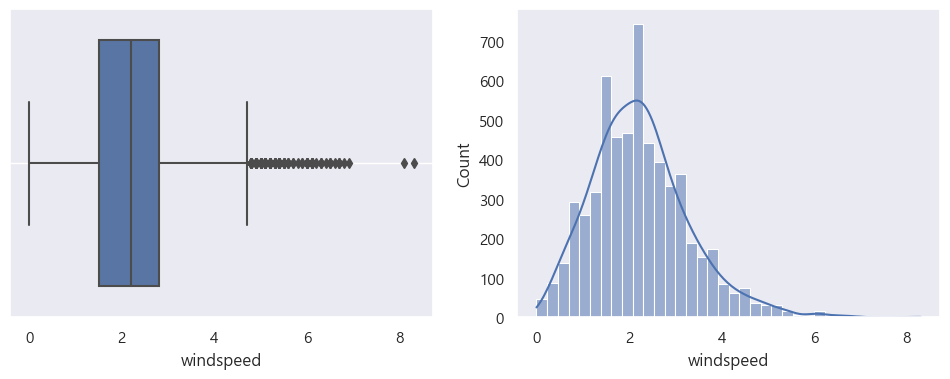

In [61]:
#변수의 분포를 확인해보세요.
# 바람이 Q3*1.5IQR(4.75) 이상으로 부는 날은 전부 결측치로 처리되었다.
# 바람이 2.5 이상으로 넘어가면 대여량이 감소하는 것으로 보인다.
# 50%의 대여건수가 1.5~2.8 사이에 몰려있다.

var = 'windspeed'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True,  bins=36)
plt.grid()

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [50]:
#위 정보로부터 파악하신 내용을 정리해보세요.

# 이 변수의 의미를 작성해보세요. -> 풍속 데이터

#변수의 자료형을 확인해보세요. -> int64

#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# 결측치가 존재하지 않는다. 만약 결측치가 존재한다면, 분포를 본 뒤 결정할 수 있을 것 같다.

#변수의 기초 통계량을 확인해보세요
# 최대8, 최소0, 평균2.2, 중앙값2.2 편차1.0 -> 바람이 엄청 빨리 부는 날의 분포는 적을 것 같다.


#변수의 분포를 확인해보세요.
# 바람이 Q3*1.5IQR(4.75) 이상으로 부는 날은 전부 결측치로 처리되었다.
# 바람이 2.5 이상으로 넘어가면 대여량이 감소하는 것으로 보인다.
# 50%의 대여건수가 1.5~2.8 사이에 몰려있다.


7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요. --> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [51]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# 결측치가 없다.만약 결측치가 있다면, 중앙값으로 처리 가능할 것 같다.

0

4. 변수의 기초 통계량 확인

In [52]:
#변수의 기초 통계량을 확인해보세요
# 최소19, 최대100, 중앙값70, 평균68
sbikedata['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

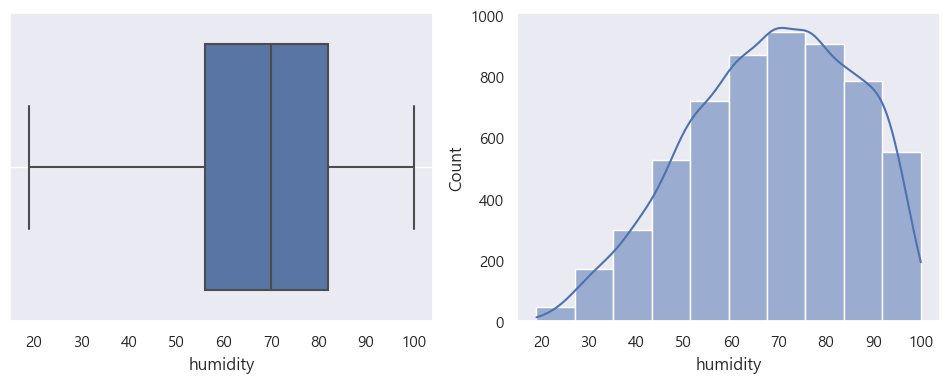

In [54]:
#변수의 분포를 확인해보세요.
# 중앙값70, 평균68을 기준으로 습도가 적은날보다 습도가 높은 날이 더 많아보인다.

var = 'humidity'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True,  bins=10)
plt.grid()

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.   --> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [62]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# 결측치가 없다. 만약 결측치가 존재한다면, 분포를 보고 어떻게 처
sbikedata['visibility'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [63]:
#변수의 기초 통계량을 확인해보세요
# 최소60, 최대2000, 평균1758, 중앙값2000, 편차490
# 가시거리가 좋은날과 좋지 못한날의 편차가 커보인다.
# 대부분의 날짜는 가시거리가 좋아 보인다.
sbikedata['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

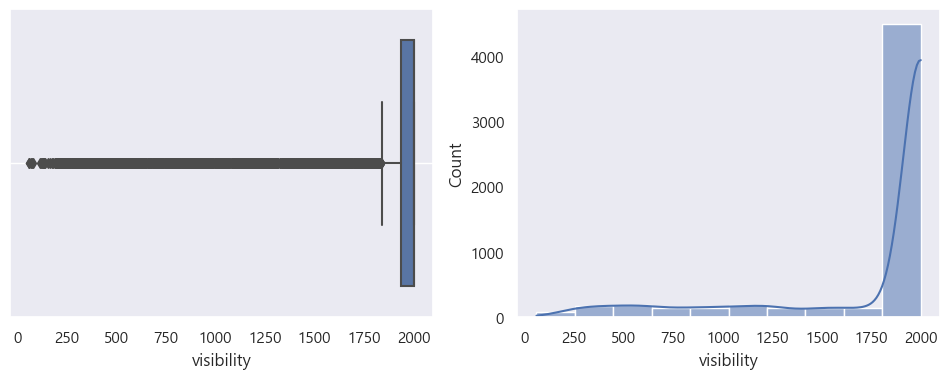

In [64]:
#변수의 분포를 확인해보세요.
# 대부분 가시거리 2000에 해당하는 것으로 보인다.
# 때문에 그 외에 분포를 확인할 수 없다.
# 2000을 제외하고 분석을 다시 해보는 것이 좋겠따.

var = 'visibility'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True,  bins=10)
plt.grid()

plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [65]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

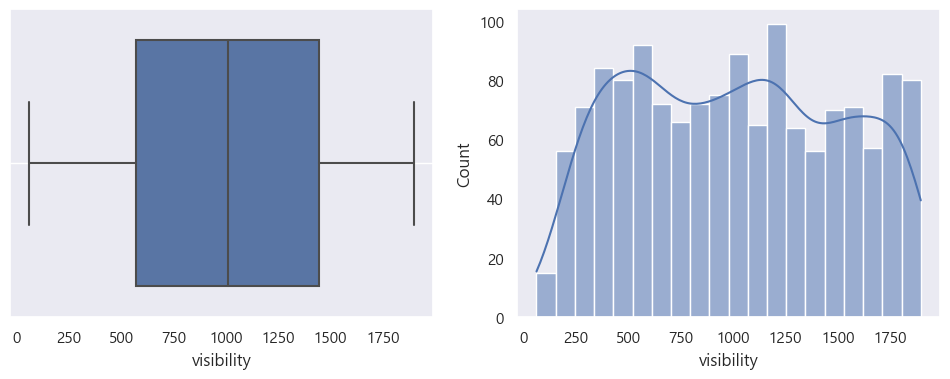

In [66]:
# 추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
# 가시거리 1900보다 작은 데이터를 대상으로 분석해본 결과, 분포도는 비슷하다
# 즉, 특별히 가시거리가 나쁜날의 건수는 많지 않다.
# 가시 거리가 좋은날에 많이 탄다.

sbikedata_for_vis = sbikedata[sbikedata['visibility'] < 1900]

var = 'visibility'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata_for_vis)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata_for_vis, kde=True,  bins=20)
plt.grid()

plt.show()

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [67]:
#변수의 자료형을 확인해보세요. --> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [68]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# 결측치가 128개 존재한다. 중앙값으로 결측치를 대체하고 싶다.
sbikedata['ozone'].isna().sum()

sbikedata['ozone'].fillna(sbikedata['ozone'].median(), inplace=True)
sbikedata['ozone'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [69]:
#변수의 기초 통계량을 확인해보세요
# 최소0.001 최대0.137 중앙값0.031 평균0.031
# 결측치 대체 후 기초동계량: 
sbikedata['ozone'].describe()

count    5827.000000
mean        0.031794
std         0.018075
min         0.001000
25%         0.020000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

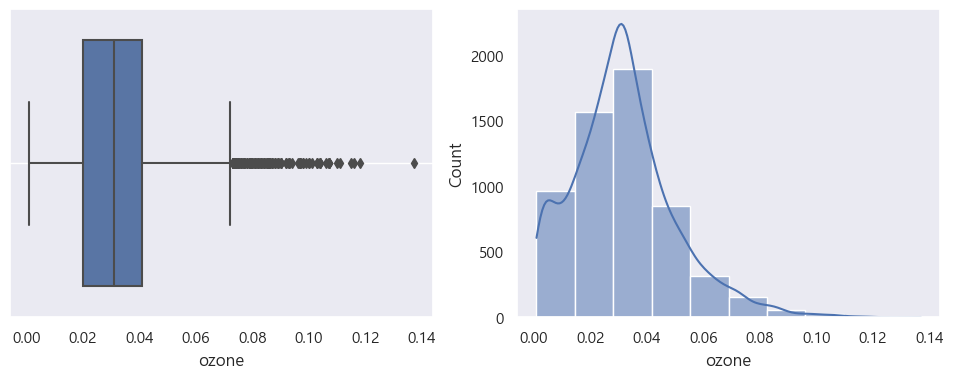

In [70]:
#변수의 분포를 확인해보세요.
# 0.12만 넘어가도 오존 경보
var = 'ozone'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True,  bins=10)
plt.grid()

plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [71]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [72]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [73]:
#변수의 자료형을 확인해보세요. --> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [74]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# 결측치 102개 존재, 결측치를 중앙값으로 대체한다.
print(sbikedata['PM10'].isna().sum())
sbikedata['PM10'].fillna(sbikedata['PM10'].median(), inplace=True)
print(sbikedata['PM10'].isna().sum())

102
0


4. 변수의 기초 통계량 확인

In [75]:
#변수의 기초 통계량을 확인해보세요
# 최소3, 최대827, 평균31, 중앙값25, Q3:37
# 결측치 대체 후 변동된 기초 통계량은 변동이 없는 수준
sbikedata['PM10'].describe()

count    5827.000000
mean       31.848636
std        42.619132
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

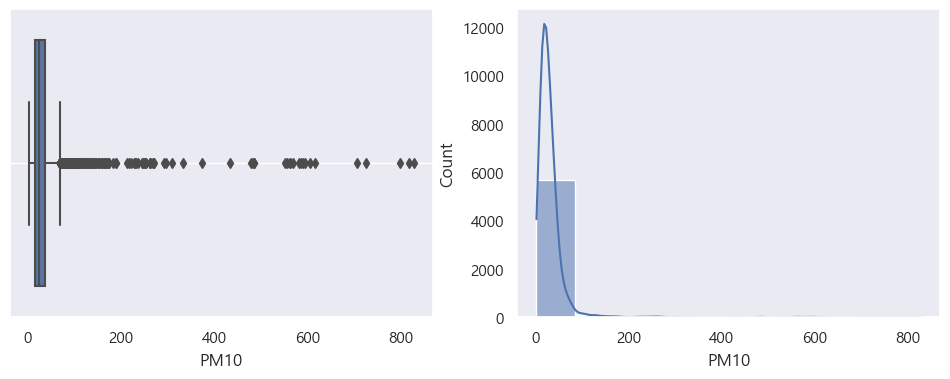

In [76]:
#변수의 분포를 확인해보세요.

#등급지수범위
#좋음0~30
#보통31~80
#나쁨81~150
#매우나쁨151~

# 75%이상의 데이터가 20보다 작으므로, 좋음~보통이 75%를 차지한다고 볼 수 있다.


var = 'PM10'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True,  bins=10)
plt.grid()

plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [77]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

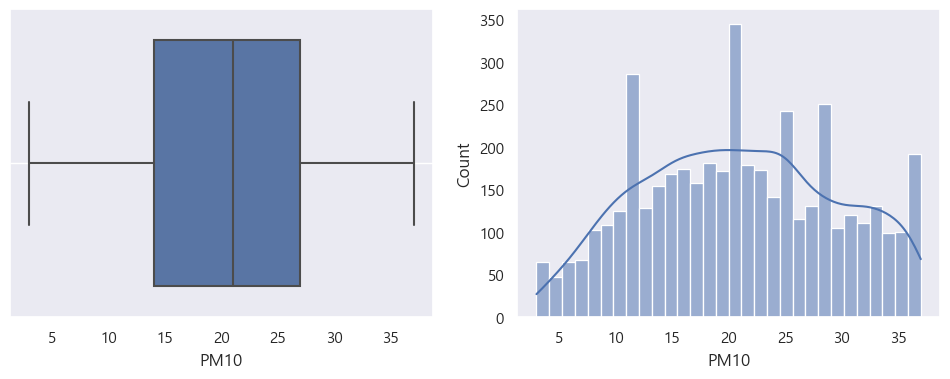

In [78]:
# 추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
# 미세먼지가 Q3(37) 이상인 놈들 다 버리고 분석하려 한다.

sbikedata_for_pm10 = sbikedata[sbikedata['PM10'] <= 37]

var = 'PM10'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata_for_pm10)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata_for_pm10, kde=True,  bins=30)
plt.grid()

plt.show()

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [79]:
#변수의 자료형을 확인해보세요. --> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [80]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# 결측치 95개 존재, 결측치를 중앙값으로 대체한다.
print(sbikedata['PM2.5'].isna().sum())
sbikedata['PM2.5'].fillna(sbikedata['PM2.5'].median(), inplace=True)
print(sbikedata['PM2.5'].isna().sum())

95
0


4. 변수의 기초 통계량 확인

In [81]:
#변수의 기초 통계량을 확인해보세요
# 최소1 최대125 평균15.66 중앙값13 Q3:20
sbikedata['PM2.5'].describe()

count    5827.000000
mean       15.623134
std        13.741748
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

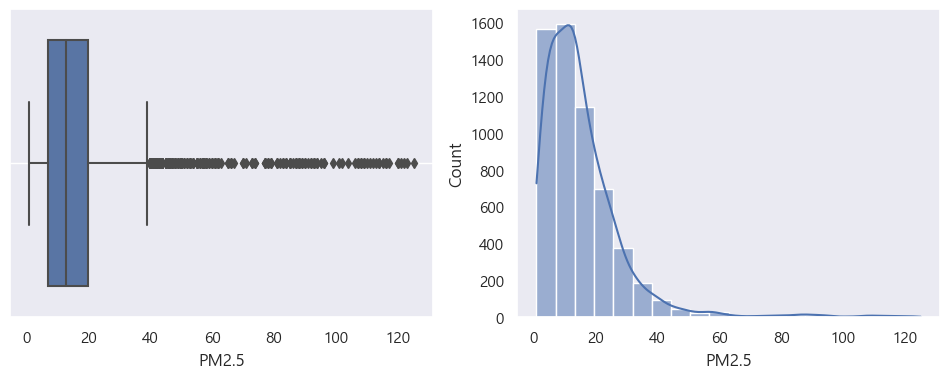

In [82]:
#변수의 분포를 확인해보세요.
#등급지수범위
#좋음0~15
#보통16~35
#나쁨36~75
#매우나쁨76~
# 출처 : 서울특별시 대기환경정보

# 75%이상의 데이터가 20보다 작으므로, 좋음~보통이 75%를 차지한다고 볼 수 있다.

var = 'PM2.5'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True,  bins=20)
plt.grid()

plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [83]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [84]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [85]:
#변수의 자료형을 확인해보세요. --> int64

3. 변수의 결측치 존재 여부 및 조치방안

In [86]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
# 결측치 없음
sbikedata['count'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [137]:
#변수의 기초 통계량을 확인해보세요
# 최소1 최대 1746 평균 215 중앙값 186
# 1건~315건 사이에 75%가 몰려있다.
sbikedata['count'].describe()
sbikedata_remove_outlier['count'].describe()

count    4380.000000
mean      128.963927
std        95.692293
min         1.000000
25%        34.750000
50%       114.000000
75%       213.250000
max       315.000000
Name: count, dtype: float64

5. 변수의 분포 확인

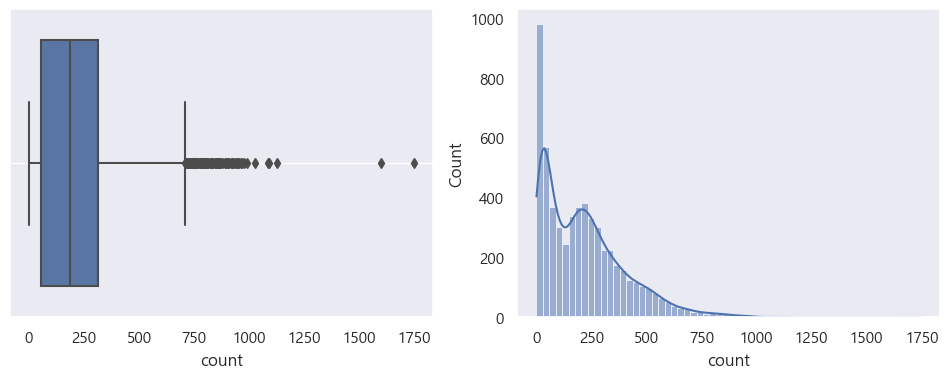

In [88]:
#변수의 분포를 확인해보세요.
# count가 1500이상인 날은 뭔 날임?????
# 약 220건을 기준으로 값이 감소하는 모습을 보인다.

var = 'count'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata, kde=True)
plt.grid()

plt.show()

In [89]:
sbikedata[sbikedata['count']>1500]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
665,2021-04-28,18,49.0,15.0,0.033,17.2,0,3.0,40,2000,1600
3710,2021-09-02,18,20.0,8.0,0.043,25.4,0,2.1,65,2000,1746


6. 위 정보로 부터 파악한 내용 정리

In [122]:
#위 정보로부터 파악하신 내용을 정리해보세요.

#변수의 기초 통계량을 확인해보세요
# 최소1 최대 1746 평균 215 중앙값 186
# 1건~315건 사이에 75%가 몰려있다.

#변수의 분포를 확인해보세요.
# count가 1500이상인 날은 뭔 날임?????
# 약 220건을 기준으로 값이 감소하는 모습을 보인다.

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
665,2021-04-28,18,49.0,15.0,0.033,17.2,0,3.0,40,2000,1600
3710,2021-09-02,18,20.0,8.0,0.043,25.4,0,2.1,65,2000,1746


7. 추가 분석사항 도출

In [150]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
# 이상치가 보인다. 이상치 제거 후 기초통계량 및 분포 재확인 필요
sbikedata_remove_outlier = sbikedata[sbikedata['count'] <= 315]
sbikedata_remove_outlier = sbikedata_remove_outlier[sbikedata_remove_outlier['count']>=35]
# print(len(sbikedata[sbikedata['count'] > 315]))
sbikedata_remove_outlier

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
5,2021-04-01,6,31.0,14.0,0.009,12.6,0,3.0,45,2000,77
6,2021-04-01,7,30.0,10.0,0.018,12.0,0,3.5,46,2000,171
8,2021-04-01,9,35.0,10.0,0.032,16.2,0,4.3,38,2000,218
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


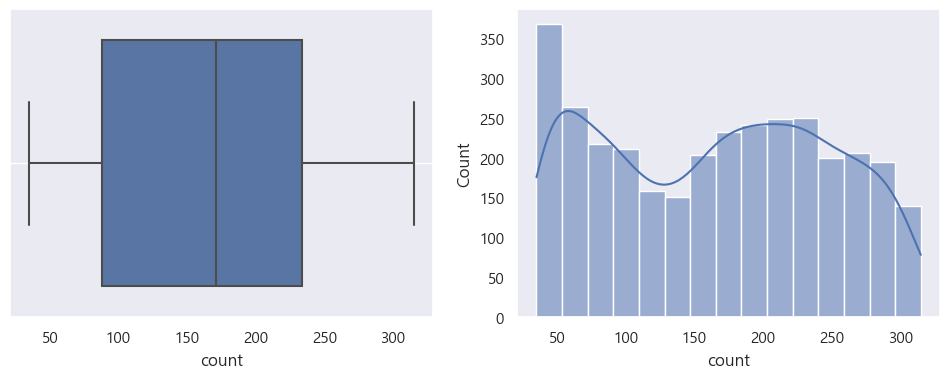

In [151]:
#변수의 분포를 확인해보세요.
# count가 1500이상인 날은 뭔 날임?????
# 약 220건을 기준으로 값이 감소하는 모습을 보인다.

var = 'count'
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=var, data=sbikedata_remove_outlier)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(x=var, data=sbikedata_remove_outlier, kde=True)
plt.grid()

plt.show()

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

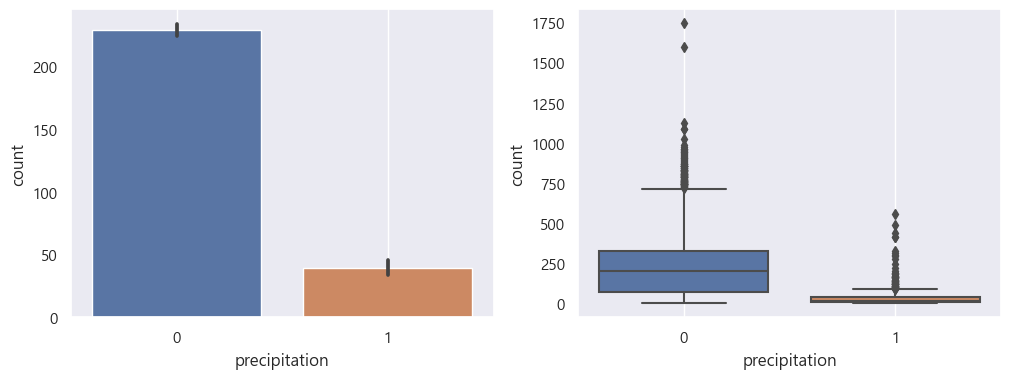

In [152]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'precipitation'

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=var, y=target, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(x=var, y=target, data=sbikedata)
plt.grid()

plt.show()

In [153]:
# 두 그룹으로 데이터 저장
rain = sbikedata.loc[sbikedata['precipitation']==0, 'count']
not_rain = sbikedata.loc[sbikedata['precipitation']==1, 'count']

In [154]:
# 연관이 있다!!!
# 통계량은 21로 크다고 이야기할 수 있다~
spst.ttest_ind(rain, not_rain)

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

2. 시간대에 따른 따릉이 대여량간 이변량 분석

In [155]:
sbikedata_remove_outlier['date'] = pd.to_datetime(sbikedata_remove_outlier['date'])

sbikedata_remove_outlier['days'] = sbikedata_remove_outlier['date'].dt.day_name()
sbikedata_remove_outlier

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,days
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,Thursday
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,Thursday
5,2021-04-01,6,31.0,14.0,0.009,12.6,0,3.0,45,2000,77,Thursday
6,2021-04-01,7,30.0,10.0,0.018,12.0,0,3.5,46,2000,171,Thursday
8,2021-04-01,9,35.0,10.0,0.032,16.2,0,4.3,38,2000,218,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,Monday
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,Monday
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,Monday
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,Monday


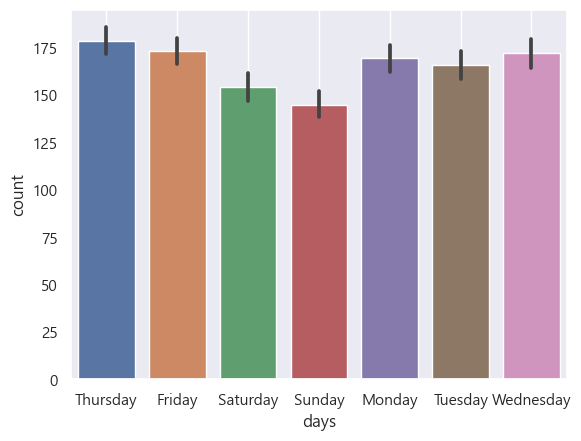

In [156]:
sns.barplot(x='days', y='count', data=sbikedata_remove_outlier)
plt.grid()
plt.show()

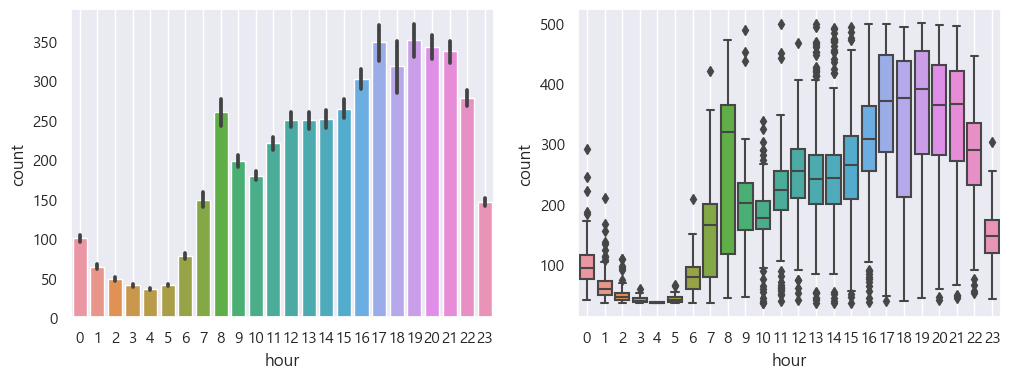

In [146]:
sbikedata_remove_outlier

target = 'count'
var = 'hour'

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=var, y=target, data=sbikedata_remove_outlier)
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(x=var, y=target, data=sbikedata_remove_outlier)
plt.grid()

plt.show()

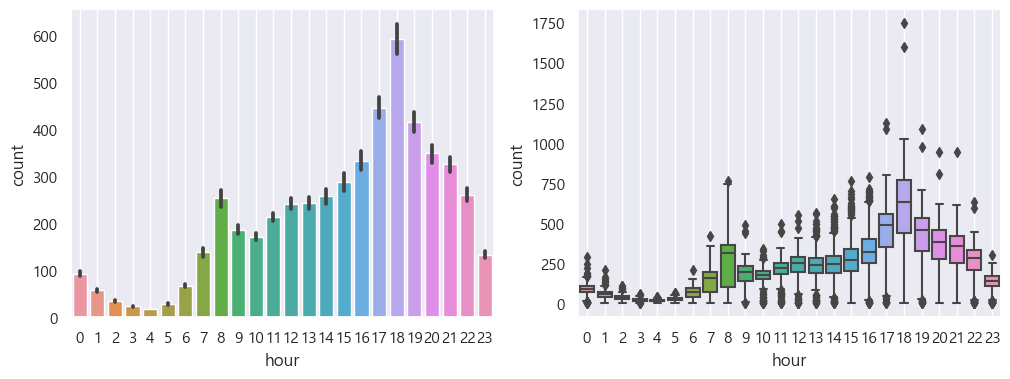

In [103]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'hour'

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=var, y=target, data=sbikedata)
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(x=var, y=target, data=sbikedata)
plt.grid()

plt.show()

In [147]:
# 두 그룹으로 데이터 저장
hour_1 = sbikedata.loc[sbikedata['hour']==1, 'count']
hour_2 = sbikedata.loc[sbikedata['hour']==2, 'count']
hour_3 = sbikedata.loc[sbikedata['hour']==3, 'count']
hour_4 = sbikedata.loc[sbikedata['hour']==4, 'count']
hour_5 = sbikedata.loc[sbikedata['hour']==5, 'count']
hour_6 = sbikedata.loc[sbikedata['hour']==6, 'count']
hour_7 = sbikedata.loc[sbikedata['hour']==7, 'count']
hour_8 = sbikedata.loc[sbikedata['hour']==8, 'count']
hour_9 = sbikedata.loc[sbikedata['hour']==9, 'count']
hour_10 = sbikedata.loc[sbikedata['hour']==10, 'count']
hour_11 = sbikedata.loc[sbikedata['hour']==11, 'count']
hour_12 = sbikedata.loc[sbikedata['hour']==12, 'count']

In [150]:
spst.f_oneway(hour_1, hour_2, hour_3, hour_4)

F_onewayResult(statistic=253.85716335977267, pvalue=2.191382824011994e-121)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [ ]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
# 시간대가 어케 숫자향 feature임? 이건 범주형 이라고 생각함.
target = 'count'
var = 'hour'
data = sbikedata
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x=var, y=target, data = data)
plt.grid()
plt.subplot(1,2,2)
sns.regplot(x=var, y = target, data = data)
plt.grid()
plt.show()

result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

3. 온도 데이터와 따릉이 대여량간 분석

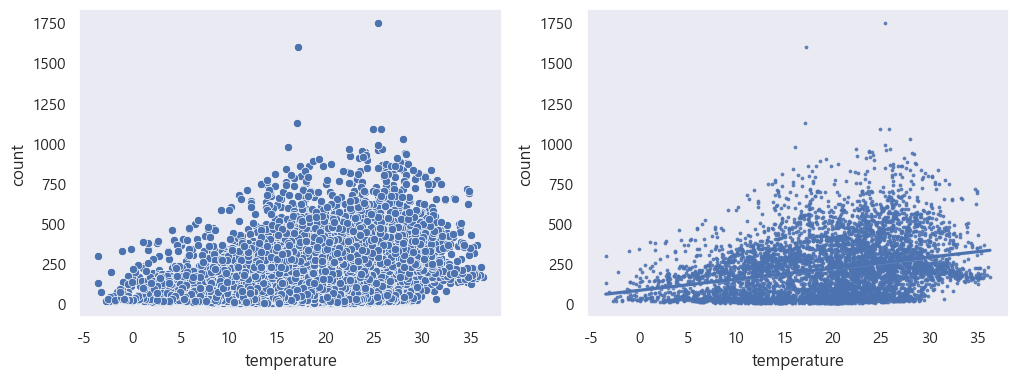

상관계수 : 0.2771692363089791, p-value : 2.940516555113978e-103


In [149]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'temperature'
data = sbikedata
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x=var, y=target, data = data)
plt.grid()
plt.subplot(1,2,2)
sns.regplot(x=var, y = target, data = data, scatter_kws={"s": 3})
plt.grid()
plt.show()

result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

4. 풍속 데이터와 따릉이 대여량간 분석

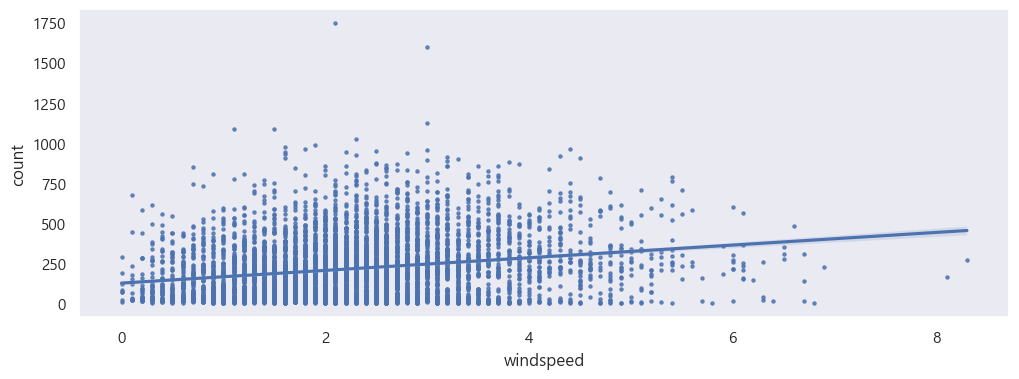

상관계수 : 0.22372189900674888, p-value : 5.243317678213925e-67


In [29]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'windspeed'
data = sbikedata
plt.figure(figsize=(12,4))

sns.regplot(x=var, y = target, data = data, scatter_kws={"s": 5})
plt.grid()
plt.show()

result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

5. 습도 데이터와 따릉이 대여량간 분석

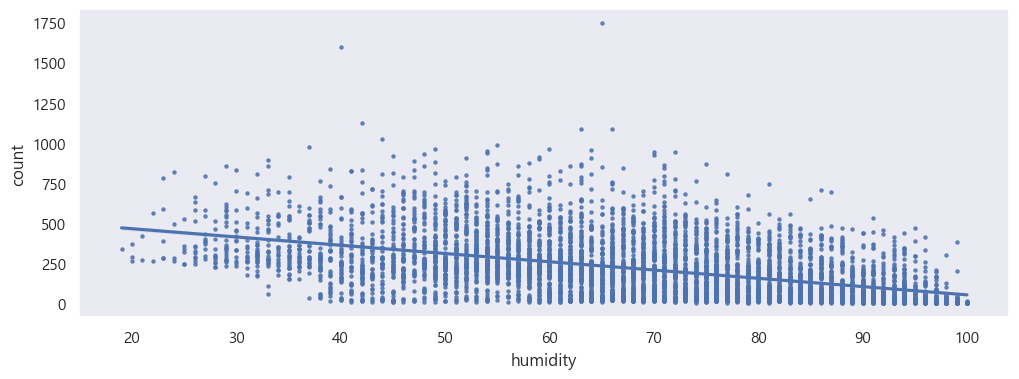

상관계수 : -0.4789554265904137, p-value : 0.0


In [30]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'humidity'
data = sbikedata
plt.figure(figsize=(12,4))

sns.regplot(x=var, y = target, data = data, scatter_kws={"s": 5})
plt.grid()
plt.show()

result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

6. 시정 데이터와 따릉이 대여량간 분석

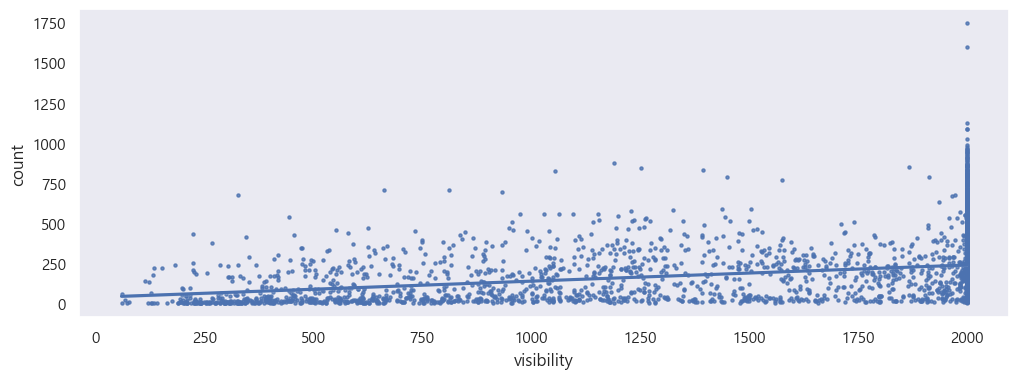

상관계수 : 0.26582778327488765, p-value : 7.87600385276935e-95


In [31]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'visibility'
data = sbikedata
plt.figure(figsize=(12,4))

sns.regplot(x=var, y = target, data = data, scatter_kws={"s": 5})
plt.grid()
plt.show()

result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

7. 오존 데이터와 따릉이 대여량간 분석

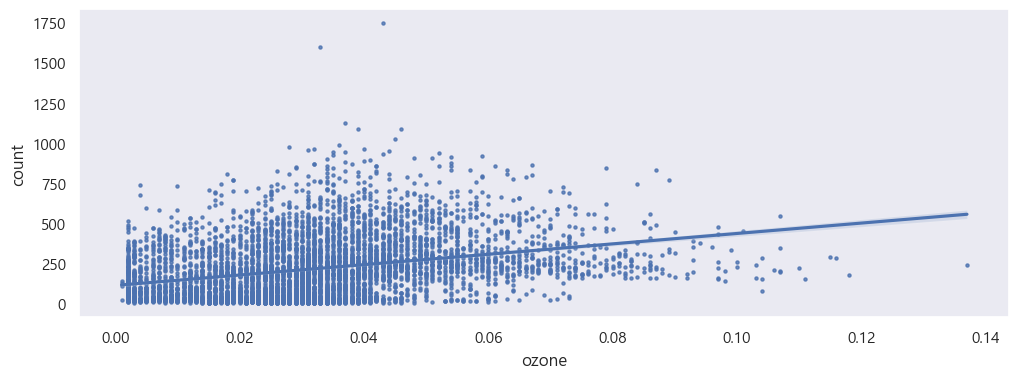

상관계수 : 0.31453346787674397, p-value : 5.666600575566576e-134


In [37]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'ozone'
data = sbikedata
plt.figure(figsize=(12,4))

sns.regplot(x=var, y = target, data = data, scatter_kws={"s": 5})
plt.grid()
plt.show()

result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

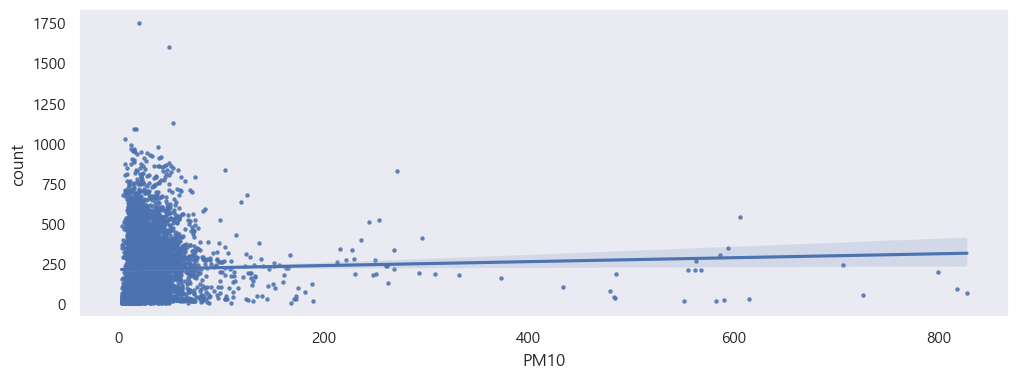

상관계수 : 0.028147495329876437, p-value : 0.03166629421724746


In [47]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'PM10'
data = sbikedata
plt.figure(figsize=(12,4))

sns.regplot(x=var, y = target, data = data, scatter_kws={"s": 5})
plt.grid()
plt.show()

result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

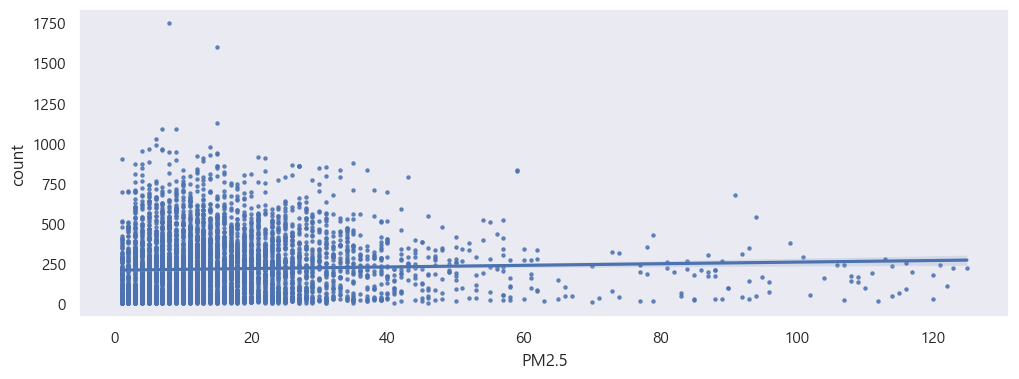

상관계수 : 0.0369543440052327, p-value : 0.004783534919886874


In [49]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
var = 'PM2.5'
data = sbikedata
plt.figure(figsize=(12,4))

sns.regplot(x=var, y = target, data = data, scatter_kws={"s": 5})
plt.grid()
plt.show()

result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

강수여부, 시간대, 

#### <font color='green'>2. 약한 관계의 변수</font>


온도, 풍속, 시정, 오존, 

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


미세먼지농도, 초미세먼지 농도

### [Step6] Insight 도출